In [34]:
# class Regression:
#     def __init__(self, coef):
#         self.coef = coef
            
#     def train(self, X, y):
#         X = np.matrix([np.ones(X.shape), X]).T
#         w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# #selection de la première colonne du dataset (loyer)
# Y = df_train.iloc[0:len(df_train),0]
# #selection de deuxième colonnes du dataset (surface)
# X = df_train.iloc[0:len(df_train),1]
# plt.axes().grid()
# plt.scatter(Y,X)
# plt.show()
# #linregress() renvoie plusieurs variables de retour
# #particulierement au slope et intercept
# slope, intercept, r_value, p_value, std_err = stats.linregress(Y, X)

# print(stats.linregress(Y, X))

# def predict(y):
#     #print(y)
#     return slope * y + intercept

# plt.axes().grid()
# plt.plot(Y, predict(Y), c='r')
# plt.scatter(Y, X)
# print(predict(1))

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


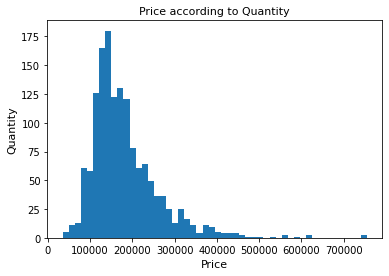

In [5]:

import matplotlib.pyplot as plt

plt.hist(df_train['SalePrice'].values, bins = 50)
plt.xlabel('Price', fontsize = 11)
plt.ylabel('Quantity', fontsize = 11)
plt.title('Price according to Quantity', fontsize = 11)
plt.show()

<AxesSubplot:ylabel='YrSold'>

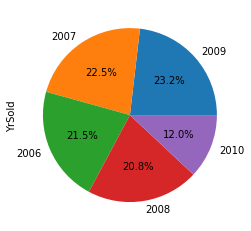

In [6]:
df_train['YrSold'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [7]:
df_train.columns.value_counts()

Id             1
CentralAir     1
GarageYrBlt    1
GarageType     1
FireplaceQu    1
              ..
MasVnrArea     1
MasVnrType     1
Exterior2nd    1
Exterior1st    1
SalePrice      1
Length: 81, dtype: int64

In [8]:
df_test.columns.value_counts()

Id               1
MSSubClass       1
GarageType       1
FireplaceQu      1
Fireplaces       1
                ..
MasVnrType       1
Exterior2nd      1
Exterior1st      1
RoofMatl         1
SaleCondition    1
Length: 80, dtype: int64

## Variables nécessaires

    - superficie
    - hauteur du plafond
    - vis à vis
      | (en plus garage)

## Variables à noter :

    - LotArea
    - GarageArea
    - 1stFlrSF
    - 2ndFlrSF
    - Condition1
    - SaleCondition nope

In [25]:
df_train[['LotArea', 'GarageArea', '1stFlrSF', '2ndFlrSF', 'Condition1']].value_counts().head()


LotArea  GarageArea  1stFlrSF  2ndFlrSF  Condition1
4435     420         848       0         Norm          5
1680     264         483       504       Norm          4
4426     420         848       0         Norm          3
8544     400         1040      0         Norm          3
3675     525         1072      0         Norm          3
dtype: int64

# Data Cleaning

In [26]:
columns_iteration = ['LotArea', 'GarageArea', '1stFlrSF', 
            '2ndFlrSF', 'Condition1']

In [27]:
print('-------------------------')

for column in columns_iteration:
    print(column + " " + str(df_train[column].isna().sum()))

print('-------------------------')

for column in columns_iteration:
    print(column + " " + str(df_train[column].isnull().sum()))
    
print('-------------------------')

-------------------------
LotArea 0
GarageArea 0
1stFlrSF 0
2ndFlrSF 0
Condition1 0
-------------------------
LotArea 0
GarageArea 0
1stFlrSF 0
2ndFlrSF 0
Condition1 0
-------------------------


### Pas besoin de Data Cleaning

# Conversion colonne `Condition1`

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
df_train[columns_iteration]

,LotArea,GarageArea,1stFlrSF,2ndFlrSF,Condition1
0,8450,548,856,854,Norm
1,9600,460,1262,0,Feedr
2,11250,608,920,866,Norm
3,9550,642,961,756,Norm
4,14260,836,1145,1053,Norm
...,...,...,...,...,...
1455,7917,460,953,694,Norm
1456,13175,500,2073,0,Norm
1457,9042,252,1188,1152,Norm
1458,9717,240,1078,0,Norm


In [30]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train['Condition1'].values.reshape(-1,1))
cond_enc_train = enc.transform(df_train['Condition1'].values.reshape(-1,1)).toarray()

cond_enc_train.shape

(1460, 9)

In [31]:
df_train_cond = pd.DataFrame(cond_enc_train)
df_train_cond.columns = ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']

df_train_cond

,Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
for col_name in df_train_cond.columns :
    df_train[col_name] = df_train_cond[col_name]

In [33]:
columns_iteration = ['LotArea', 'GarageArea', '1stFlrSF', 
            '2ndFlrSF', 'Artery', 'Feedr', 'Norm', 'RRNn', 
            'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']

In [34]:
y = df_train['YrSold']

df_train = df_train[columns_iteration]

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df_train, y)

KNeighborsClassifier()

In [36]:
df_train

,LotArea,GarageArea,1stFlrSF,2ndFlrSF,Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe
0,8450,548,856,854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600,460,1262,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11250,608,920,866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550,642,961,756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260,836,1145,1053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,460,953,694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,13175,500,2073,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,9042,252,1188,1152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,9717,240,1078,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Phase de prédiclection

In [44]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median') #most_frequent
imp.fit(df_train['YrSold'].values.reshape(-1,1))

KeyError: 'YrSold'

In [45]:
yrs_imp_test = imp.transform(df_test['YrSold'].values.reshape(-1,1))
df_test['YrSold'] = yrs_imp_test[0:,0]

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.